In [2]:
import numpy as np
import pandas as pd
import matplotlib
import math
#from skbio.diversity import alpha_diversity
#from skbio.diversity import beta_diversity
#from decimal import *
#getcontext().prec = 64
#Decimal(.001) - Decimal(.001)

In [17]:
df=pd.read_excel("currentdata.xlsx")
df2=pd.read_csv("merged022120.csv")
#df=df.transpose()
df.head()
df2.head()

,type,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
0,p1p7del,4,0,0,0,0,0,2,0,0,...,0,19,1,0,0,0,0,3,0,2
1,p1p6del,2,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,3,0
2,p1p4del,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p1p5del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,p2p6del,10,0,0,0,0,0,0,0,2,...,0,0,2,0,0,0,418,400,175,194


In [18]:
for i in range(len(df["Type"])): #cleaning extra space character from type field
    value = df["Type"][i]
    df["Type"][i] = value[:-1]
df.set_index("Type", inplace=True)

C:\Users\nekos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df2.set_index("type", inplace=True)
df2 = df2.astype("float64")

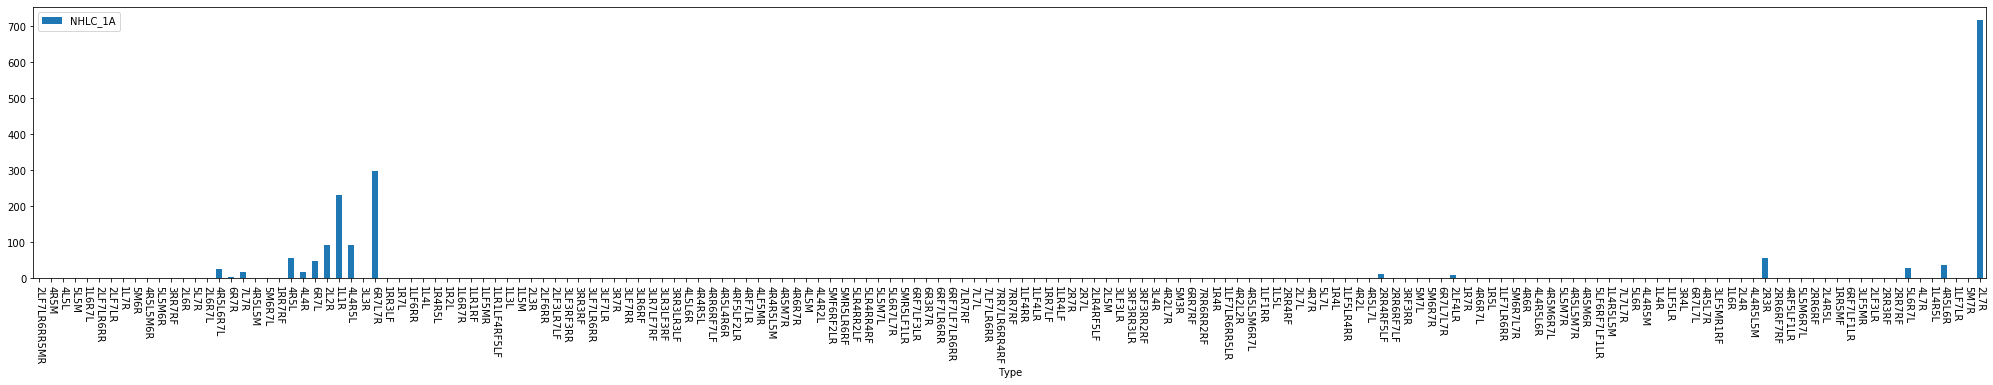

In [20]:
#df["NHLC_WT"].astype(int)
ax = df.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)
#df=df.astype(int)
#print(df.dtypes)

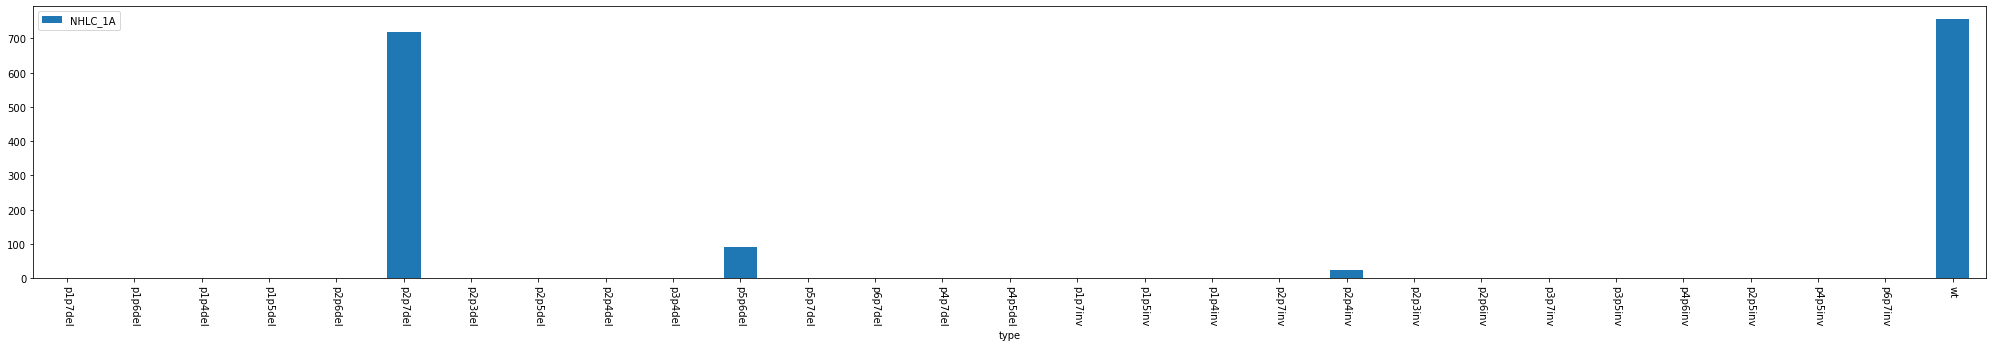

In [21]:
ax = df2.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)

In [22]:
#adding one to every field for psuedocounting purposes
for key, row in df2.iteritems():
    for key2, row2 in row.iteritems():
        df2.loc[key2][key] += 1
        
for key, row in df2.iteritems():
    for key2, row2 in row.iteritems():
        if df2.loc[key2][key] <= 0:
            print("error in",key2,key)

In [23]:
#Convert dataframes to frequencies of each column
for key, row in df2.iteritems():
    for key2, row2 in row.iteritems():
        value = df2.loc[key2][key]
        df2.loc[key2][key] = (value / sum(row))

In [24]:
# calculating KL distance between two distrubtions. Distance(P||Q) = summation[Pi*Log2(Pi/Qi)]

results = {}
for key, row in df2.iteritems():
    for key2, row2 in df2.iteritems():
        if key == key2:
            continue
        data = row * np.log2(row/row2)
        resultkey = key + "-" + key2
        results[resultkey] = sum(data)
        
        

In [25]:
resultframe = pd.DataFrame.from_dict(results, orient = 'index', columns = ["KL_Distance"])

In [26]:
#Pulling values from the NHLC_16B samples:
print(resultframe[resultframe.index.str.contains("NHLC_16B-")])

                   KL_Distance
NHLC_16B-NHLC_WT      9.231185
NHLC_16B-NHLC_1A      8.250919
NHLC_16B-NHLC_1B      8.449011
NHLC_16B-NHLC_2A      9.412669
NHLC_16B-NHLC_2B      9.534836
NHLC_16B-NHLC_3A      9.037348
NHLC_16B-NHLC_3B      8.313250
NHLC_16B-NHLC_4B      9.522262
NHLC_16B-NHLC_4C      9.275238
NHLC_16B-NHLC_5A      8.759774
NHLC_16B-NHLC_5B      8.808842
NHLC_16B-NHLC_6A      8.853614
NHLC_16B-NHLC_6B      8.357291
NHLC_16B-NHLC_7A      9.082098
NHLC_16B-NHLC_7B      8.203893
NHLC_16B-NHLC_8A      9.027970
NHLC_16B-NHLC_8B      9.382457
NHLC_16B-NHLC_9A      9.493236
NHLC_16B-NHLC_9B      9.363718
NHLC_16B-NHLC_10A     9.024541
NHLC_16B-NHLC_10B     9.086329
NHLC_16B-NHLC_11A     9.166514
NHLC_16B-NHLC_11B     9.270596
NHLC_16B-NHLC_13A     6.952634
NHLC_16B-NHLC_13B     9.465226
NHLC_16B-NHLC_14A     9.329618
NHLC_16B-NHLC_14B     9.392799
NHLC_16B-NHLC_15D     9.483561
NHLC_16B-NHLC_16A     4.333650
NHLC_16B-NHLC_17A     9.030496
NHLC_16B-NHLC_17B     8.975384
NHLC_16B

,KL_Distance
NHLC_WT,0.031198
NHLC_1A,4.427305
NHLC_1B,3.907829
NHLC_2A,-0.012574
NHLC_2B,-0.013196
NHLC_3A,0.375171
NHLC_3B,0.300440
NHLC_4B,0.028368
NHLC_4C,0.154307
NHLC_5A,2.118634


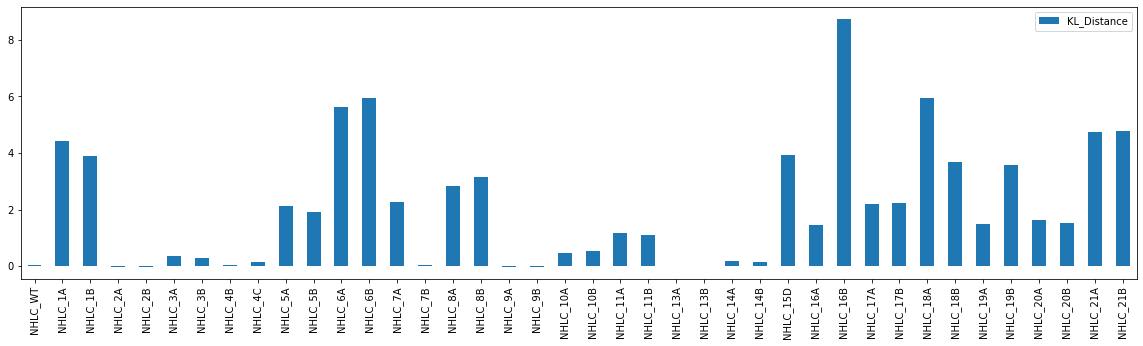

In [27]:
groups = {}
groupcount = {}
finalavg = {}
for key, row in resultframe.iteritems():
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] = 0
        groupcount[group] = 0
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] += row2
        groupcount[group] += 1

for key,value in groups.items():
    finalavg[key] = value/groupcount[key]

avgresults = pd.DataFrame.from_dict(finalavg, orient = 'index', columns = ["KL_Distance"])
display(avgresults)
ax = avgresults.plot.bar(y="KL_Distance", figsize = (20,5), rot=90)

TO DO:



In [49]:
data = df2
ids = df2.index
adiv_obs_otus = alpha_diversity('observed_otus', data, ids)
adiv_obs_otus

type
p1p7del    40
p1p6del    40
p1p4del    40
p1p5del    40
p2p6del    40
p2p7del    40
p2p3del    40
p2p5del    40
p2p4del    40
p3p4del    40
p5p6del    40
p5p7del    40
p6p7del    40
p4p7del    40
p4p5del    40
p1p7inv    40
p1p5inv    40
p1p4inv    40
p2p7inv    40
p2p4inv    40
p2p3inv    40
p2p6inv    40
p3p7inv    40
p3p5inv    40
p4p6inv    40
p2p5inv    40
p4p5inv    40
p6p7inv    40
wt         40
dtype: int64

In [50]:
get_alpha_diversity_metrics()

NameError: name 'get_alpha_diversity_metrics' is not defined